## Introduction

In this notebook, we will build a simple machine learning model to predict the risk of a heart attack using a Kaggle dataset.  
The dataset contains basic medical and lifestyle features, making it a suitable starting point for learning applied machine learning in healthcare.  

This notebook is designed for **educational purposes**:  
- To help students understand the end-to-end workflow of machine learning.  
- To demonstrate how real-world health data can be analyzed and modeled.  
- To provide hands-on experience with data exploration, preprocessing, model training, and evaluation.  

📌 **Context**:  
This notebook is part of the workshop **"Introduction to Machine Learning for Bioinformatics"**, presented by **Matin Ghasemi** at the **Student Symposium of the 3rd International Edition and 12th Iranian Conference on Bioinformatics**.  

## 1. Data Overview
Take the first look at the dataset: understand the shape, column names, data types, missing values, and a few sample rows.  
*(Goal: Get familiar with the dataset before analysis.)*

### Dataset
link: https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset

#### Heart Attack Risk Dataset - Column Descriptions
| Column Name                | Data Type      | Description                                                                   |
|----------------------------|----------------|-------------------------------------------------------------------------------|
| Patient ID                 | Categorical    | Unique identifier assigned to each patient.                                   |
| Age                        | Numeric        | Age of the patient in years.                                                  |
| Sex                        | Categorical    | Biological sex of the patient (male, female).                           |
| Cholesterol                | Numeric        | Cholesterol level (usually measured in mg/dL).                                |
| Blood Pressure             | Numeric        | Patient’s blood pressure reading (mmHg) in the format Systolic/Diastolic.     |
| Heart Rate                 | Numeric        | Number of heartbeats per minute (bpm).                                        |
| Diabetes                   | Categorical    | Whether the patient has diabetes (0/1).                                       |
| Family History             | Categorical    | Presence of heart disease in family history (yes/no or 0/1).                  |
| Smoking                    | Categorical    | Smoking status of the patient (0/1).                                          |
| Obesity                    | Categorical    | Whether the patient is obese (0/1).                                           |
| Alcohol Consumption        | Numeric/Categorical | Level of alcohol intake                                                  |
| Exercise Hours Per Week    | Numeric        | Average weekly exercise duration in hours.                                    |
| Diet                       | Categorical    | Quality/type of diet (healthy, unhealthy, average).                           |
| Previous Heart Problems    | Categorical    | History of past heart-related issues (0/1).                                   |
| Medication Use             | Categorical    | Whether the patient is on any regular medications (0/1).                      |
| Stress Level               | Categorical    | Reported stress level (on a scale from 1 to 10).                              |
| Sedentary Hours Per Day    | Numeric        | Average hours spent sitting/inactive daily.                                   |
| Income                     | Numeric/Categorical | Patient’s income level                                                   |
| BMI                        | Numeric        | Body Mass Index, a measure of body fat based on height and weight.            |
| Triglycerides              | Numeric        | Triglyceride level in the blood (mg/dL).                                      |
| Physical Activity Days Per Week | Numeric   | Number of days per week with physical activity                                |
| Sleep Hours Per Day        | Numeric        | Average daily sleep duration in hours                                         |
| Country                    | Categorical    | Patient’s country of residence.                                               |
| Continent                  | Categorical    | Continent of the patient’s residence                                          |
| Hemisphere                 | Categorical    | Hemisphere (northern/southern) of patient’s location.                         |
| Heart Attack Risk          | Categorical    | Estimated risk level of heart attack (label/class).                           |



### Importing libraies

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read data and getting familiar with it

In [2]:
df = pd.read_csv('./data/heart_attack_prediction_dataset.csv')

In [3]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [4]:
print(f"Dataset Shape: {df.shape}")
print(f"Number of patients: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

Dataset Shape: (8763, 26)
Number of patients: 8763
Number of features: 26


In [5]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [7]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


Missing Values \
This sample dataset is clean. In real-world scenarios, data cleaning and handling missing values are crucial steps.

In [8]:
df.isna().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

## 2. Exploratory Data Analysis (EDA)
Explore the dataset using summary statistics and visualizations. Look for distributions, correlations, and patterns between features and the target variable.  
*(Goal: Gain insights and detect potential data issues or trends.)*

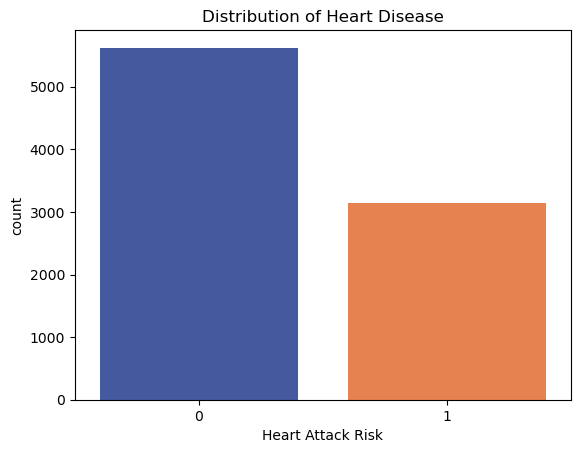

In [9]:
sns.countplot(x='Heart Attack Risk', data=df, palette=['#3652AD', '#FE7A36'])
plt.title('Distribution of Heart Disease')
plt.show()

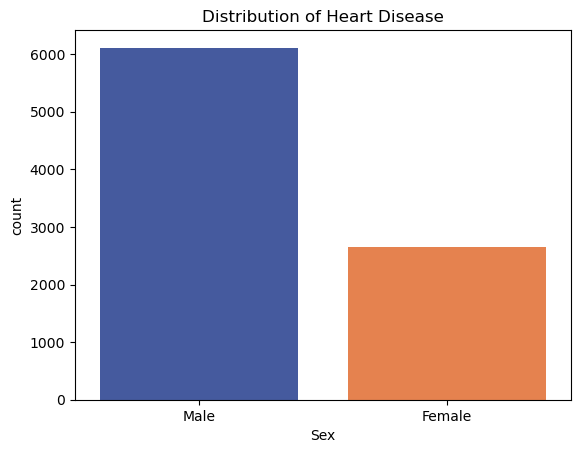

In [10]:
sns.countplot(x='Sex', data=df, palette=['#3652AD', '#FE7A36'])
plt.title('Distribution of Heart Disease')
plt.show()


Correlation Matrix:


<Axes: >

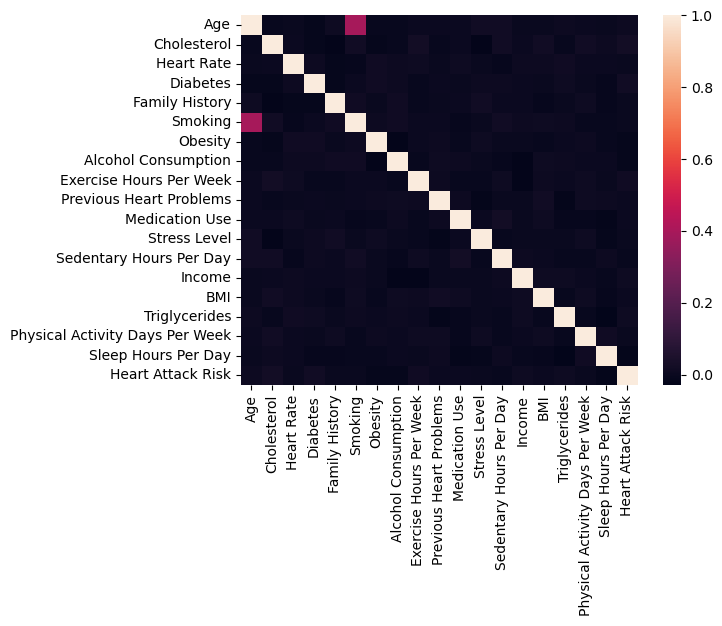

In [11]:
correlation_matrix = df.select_dtypes(include=['number']).corr()
print("\nCorrelation Matrix:")
sns.heatmap(correlation_matrix)

#### Feature distribution

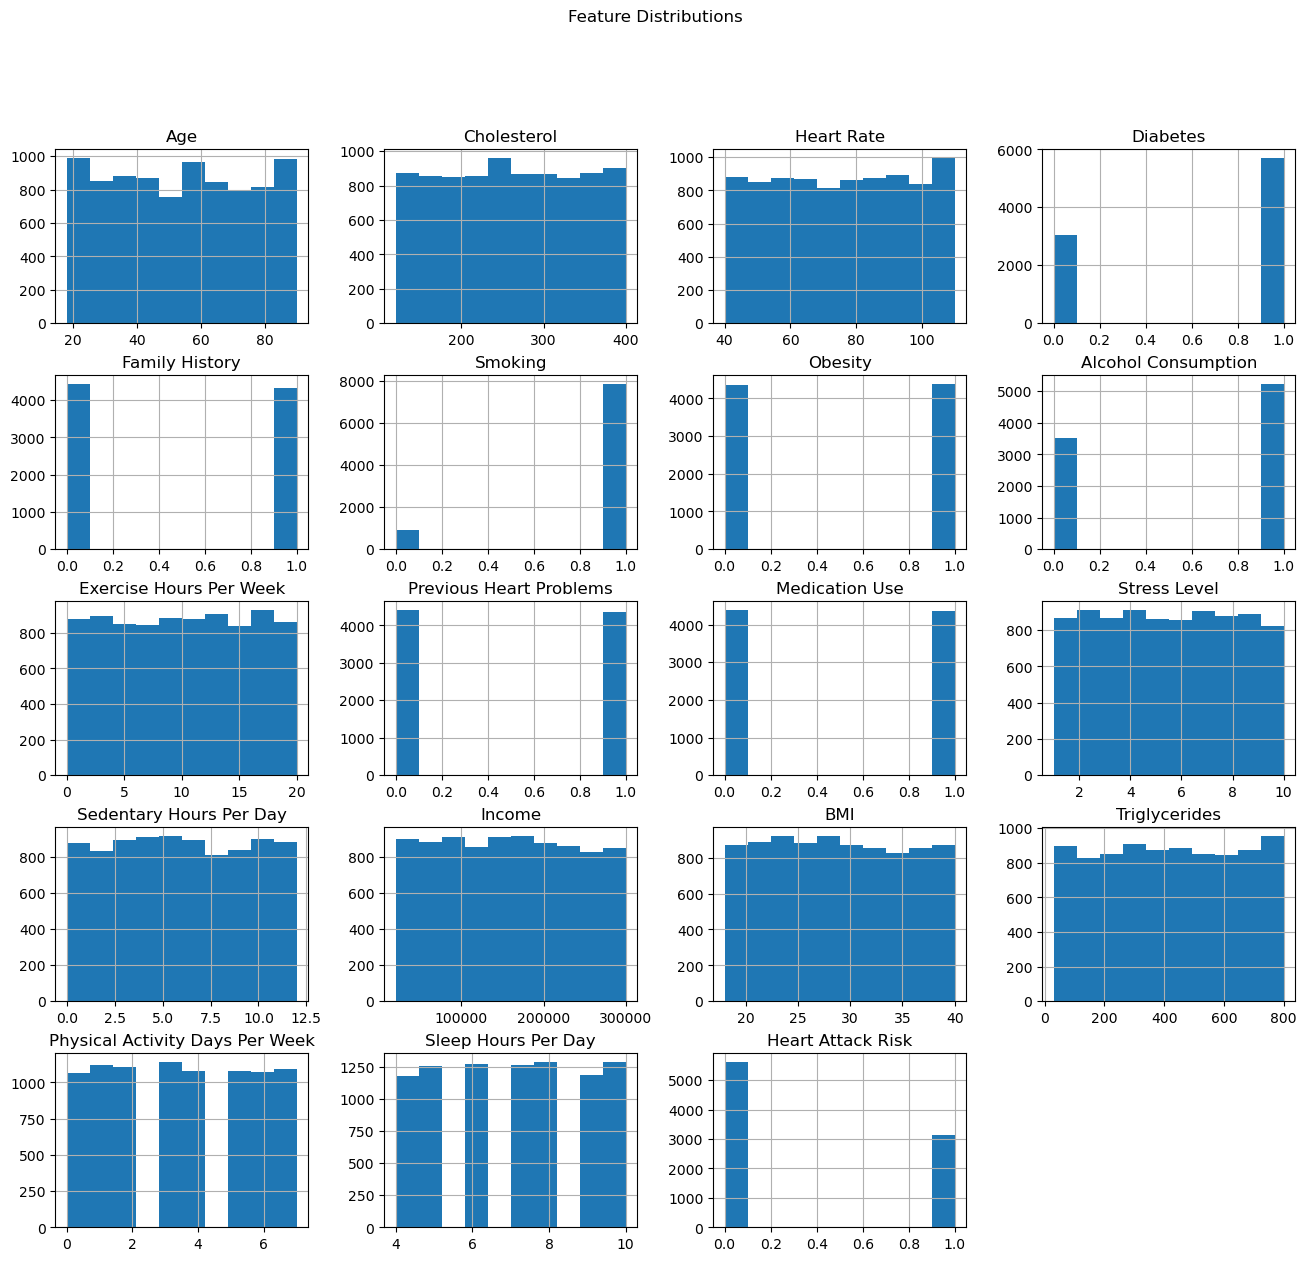

In [12]:
df.hist(figsize=(16, 14))
plt.suptitle('Feature Distributions')
plt.show()

#### Categorical features

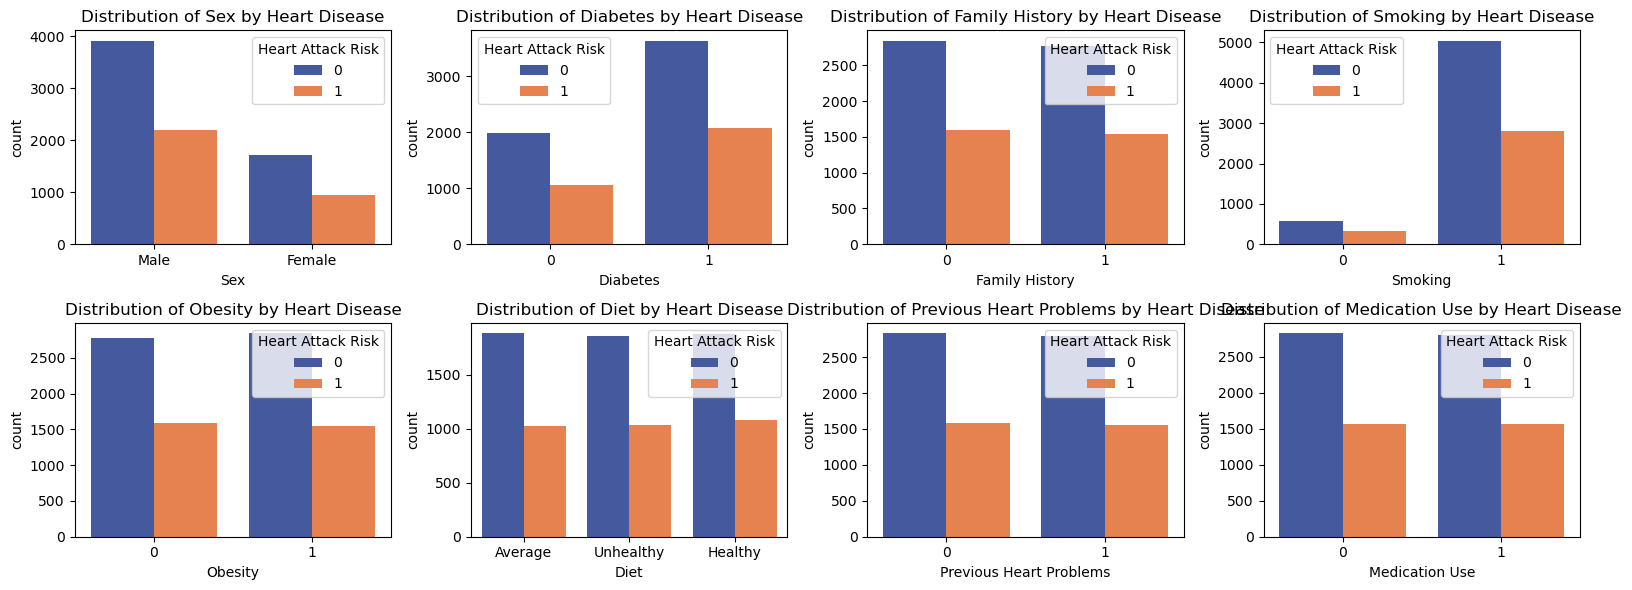

In [13]:
categorical_features = features = [
    'Sex',
    'Diabetes',
    'Family History',
    'Smoking',
    'Obesity',
    'Diet',
    'Previous Heart Problems',
    'Medication Use',

]

fig, axes = plt.subplots(2, 4, figsize=(16, 6))

for i, feature in enumerate(categorical_features):
    row_index = i // 4
    col_index = i % 4

    sns.countplot(x=feature, hue='Heart Attack Risk', data=df, palette=['#3652AD', '#FE7A36'], ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'Distribution of {feature} by Heart Disease')

plt.tight_layout()
plt.show()

#### Age distribution

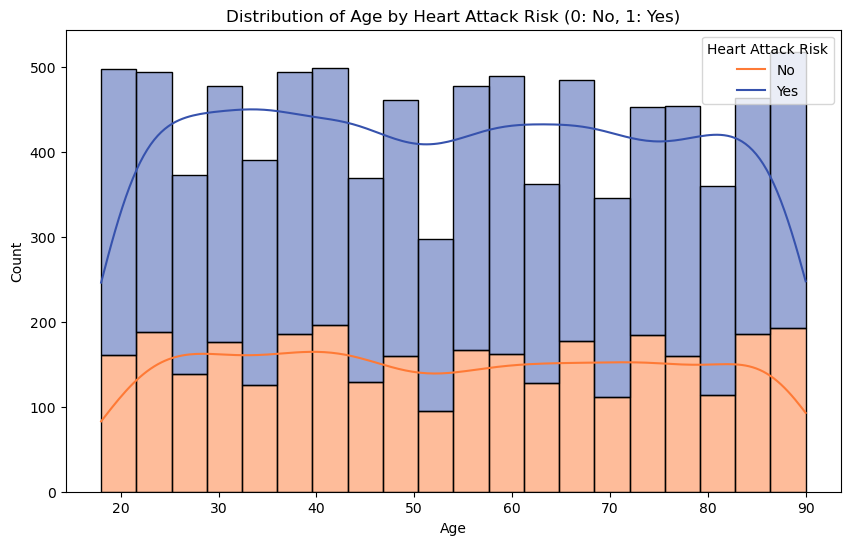

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', data=df, bins=20, kde=True, hue='Heart Attack Risk', multiple='stack', palette=['#3652AD', '#FE7A36'])
plt.title('Distribution of Age by Heart Attack Risk (0: No, 1: Yes)')
plt.legend(title='Heart Attack Risk', labels=['No', 'Yes'])
plt.show()

#### Stress Level distribution 

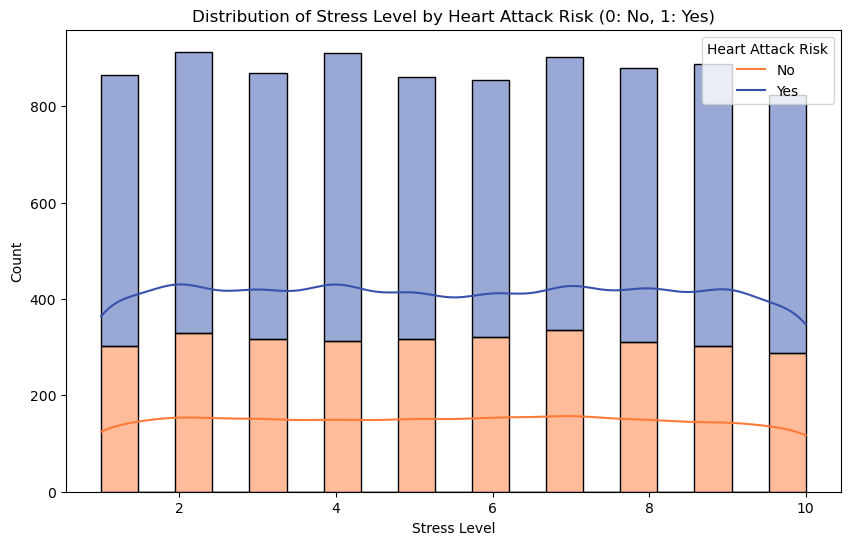

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Stress Level', data=df, kde=True, hue='Heart Attack Risk', multiple='stack', palette=['#3652AD', '#FE7A36'])
plt.title('Distribution of Stress Level by Heart Attack Risk (0: No, 1: Yes)')
plt.legend(title='Heart Attack Risk', labels=['No', 'Yes'])
plt.show()

#### Noise identification

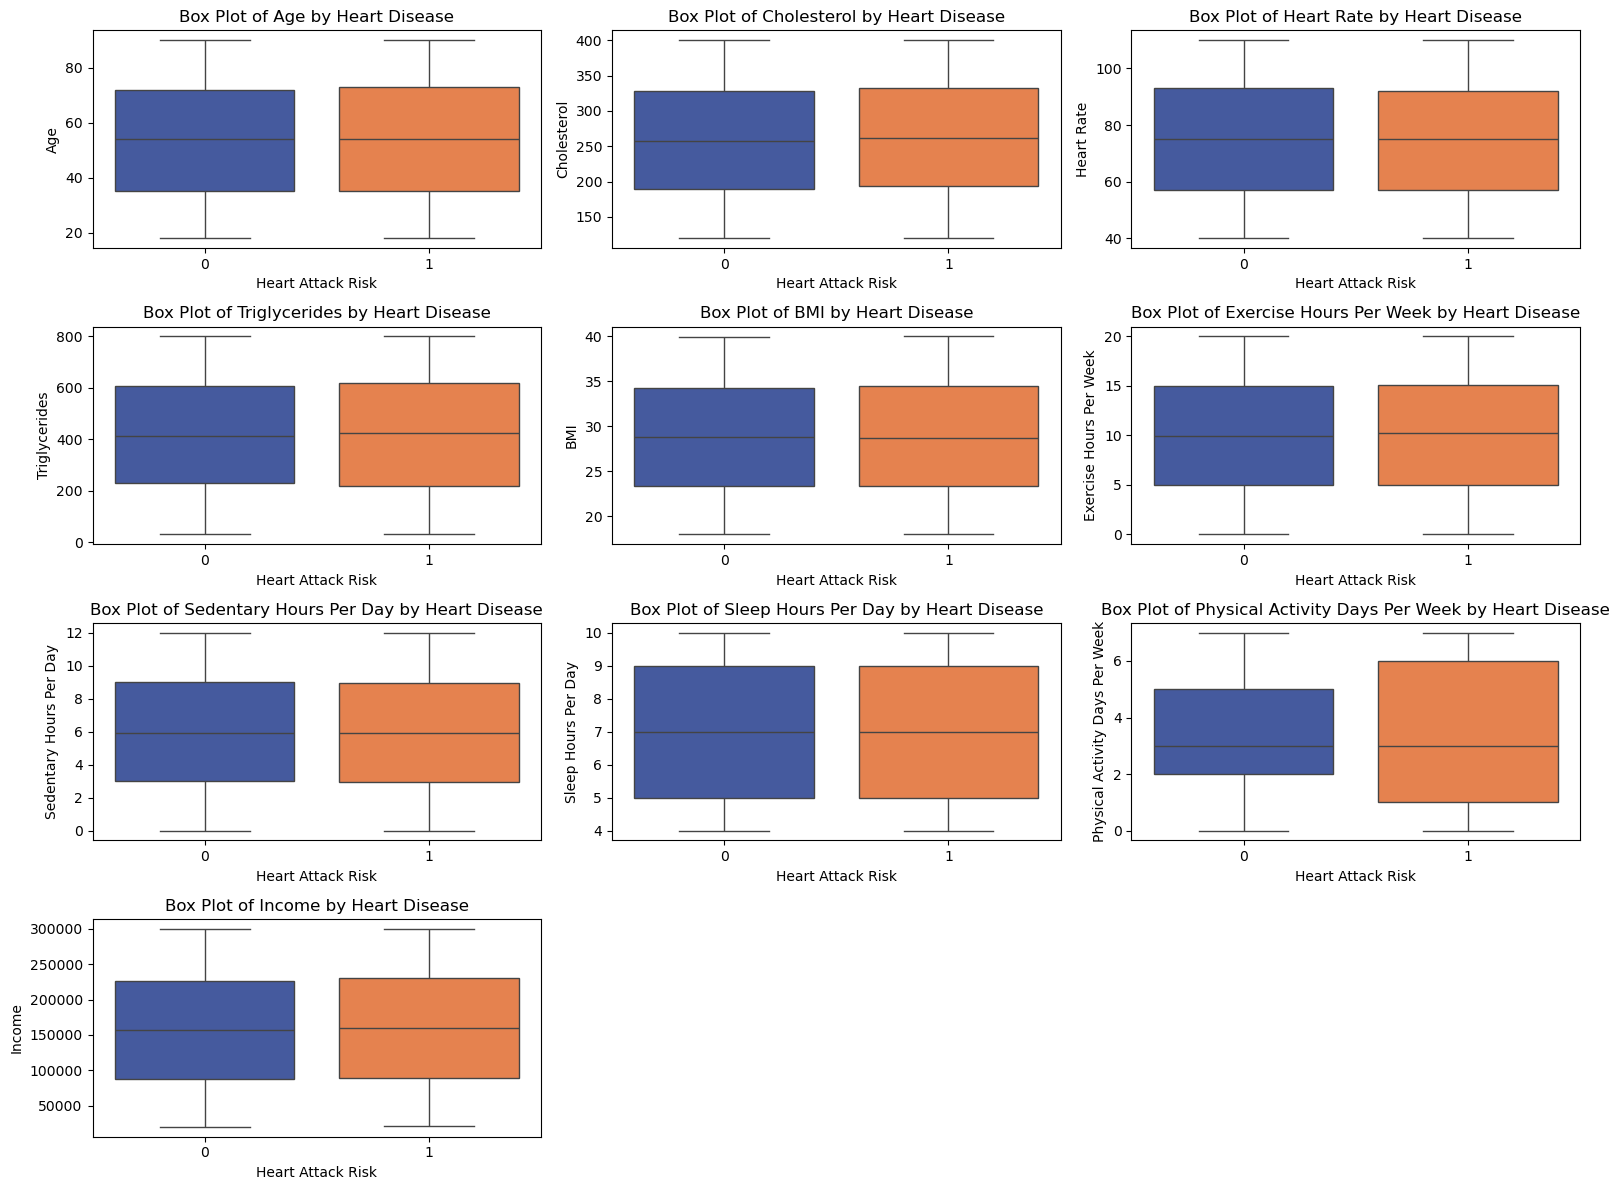

In [16]:
numerical_features = [
    'Age',
    'Cholesterol',
    'Heart Rate',
    'Triglycerides',
    'BMI',
    'Exercise Hours Per Week',
    'Sedentary Hours Per Day',
    'Sleep Hours Per Day',
    'Physical Activity Days Per Week',
    'Income',
]

plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='Heart Attack Risk', y=feature, data=df, palette=['#3652AD', '#FE7A36'])
    plt.title(f'Box Plot of {feature} by Heart Disease')

plt.tight_layout()
plt.show()

## 3. Data Preprocessing
Prepare the dataset for modeling by handling missing values, encoding categorical variables, scaling numerical features, and splitting into train/test sets.  
*(Goal: Ensure data is clean and ready for machine learning models.)*

Convert categorical features to numerical using one-hot encoding

In [17]:
df = pd.get_dummies(df, columns=['Sex', 'Smoking', 'Obesity', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Country', 'Continent', 'Hemisphere'])

Split Blood Pressure into Systolic and Diastolic

In [18]:
systolic = df['Blood Pressure'].str.split('/').str[0].values.astype(int)
diastolic = df['Blood Pressure'].str.split('/').str[1].values.astype(int)

df['Systolic'] = systolic
df['Diastolic'] = diastolic
df = df.drop('Blood Pressure', axis=1)

Drop Patient ID

In [19]:
df = df.drop('Patient ID', axis=1)

In [20]:
df.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Alcohol Consumption,Exercise Hours Per Week,Stress Level,Sedentary Hours Per Day,Income,...,Continent_Africa,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America,Hemisphere_Northern Hemisphere,Hemisphere_Southern Hemisphere,Systolic,Diastolic
0,67,208,72,0,0,0,4.168189,9,6.615001,261404,...,False,False,False,False,False,True,False,True,158,88
1,21,389,98,1,1,1,1.813242,1,4.963459,285768,...,False,False,False,False,True,False,True,False,165,93
2,21,324,72,1,0,0,2.078353,9,9.463426,235282,...,False,False,False,True,False,False,True,False,174,99
3,84,383,73,1,1,1,9.828130,9,7.648981,125640,...,False,False,False,False,True,False,True,False,163,100
4,66,318,93,1,1,0,5.804299,6,1.514821,160555,...,False,True,False,False,False,False,True,False,91,88


#### Train and test dataset

In [21]:
X = df.drop('Heart Attack Risk', axis=1)
y = df['Heart Attack Risk']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
X_train_scaled

array([[ 1.42009072e+00, -5.34474800e-01, -2.90186001e-04, ...,
        -7.38752487e-01, -3.77030143e-01, -1.43120991e-01],
       [ 1.60835739e+00, -6.33313881e-01,  1.40427915e+00, ...,
        -7.38752487e-01, -1.49370102e-01, -8.90365871e-01],
       [ 1.70249073e+00, -4.47990604e-01,  1.11367860e+00, ...,
         1.35363334e+00,  1.10276012e+00, -1.36588534e+00],
       ...,
       [-1.02737609e+00, -1.12750929e+00,  4.35610643e-01, ...,
        -7.38752487e-01,  7.99213402e-01, -4.14846402e-01],
       [ 1.46715739e+00,  3.05657392e-01, -1.01739212e+00, ...,
        -7.38752487e-01,  1.14070346e+00, -8.22434518e-01],
       [ 1.65542406e+00, -2.50312441e-01, -1.06582555e+00, ...,
        -7.38752487e-01, -1.28767031e+00,  6.04123888e-01]],
      shape=(7010, 57))

In [24]:
print(f'Length of training data: {len(X_train_scaled)}')
print(f'Length of test data: {len(X_test_scaled)}')

Length of training data: 7010
Length of test data: 1753


## 4. Model Selection & Training
Train multiple baseline models (e.g., Logistic Regression, Random Forest, XGBoost) to compare their performance.  
*(Goal: Identify which algorithms work best for this dataset.)*

### Models

### Logistic Regression
Logistic Regression is a statistical method used for binary classification problems, where the outcome variable is categorical and has two classes. In simpler terms, it's like fitting a line to predict whether something is in one category or another.

#### Define model and fit it to data

In [25]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


#### Make prediction

In [26]:
y_pred = model_lr.predict(X_test_scaled)

#### Model evaluation

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_lr = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy_lr:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.64
Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       1.00      0.00      0.01       628

    accuracy                           0.64      1753
   macro avg       0.82      0.50      0.39      1753
weighted avg       0.77      0.64      0.50      1753



#### Confusion matrix

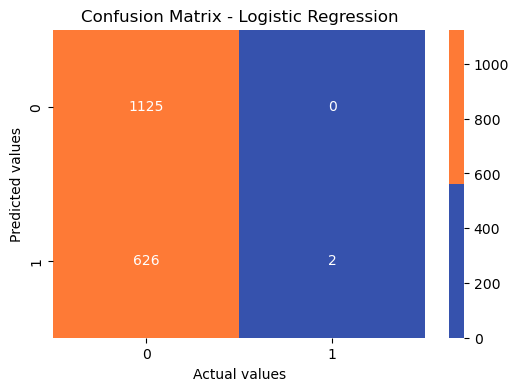

In [28]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap=sns.color_palette(['#3652AD', '#FE7A36']))
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

### Random Forest
Random Forest is a versatile and powerful machine learning algorithm. Think of it as a collection of decision trees working together to make predictions. Each tree in the forest is trained on a different subset of the data and makes its own prediction. When you want to make a prediction, each tree votes on the outcome, and the majority vote becomes the final prediction. This ensemble approach often results in more accurate and robust predictions compared to individual decision trees, making Random Forest a popular choice for various predictive tasks.

#### Define model and fit it to data

In [29]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### Make prediction

In [30]:
y_pred_rf = model_rf.predict(X_test_scaled)

#### Model evaluation

In [31]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.64
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.98      0.78      1125
           1       0.41      0.02      0.05       628

    accuracy                           0.64      1753
   macro avg       0.52      0.50      0.41      1753
weighted avg       0.56      0.64      0.51      1753



#### Confusion matrix

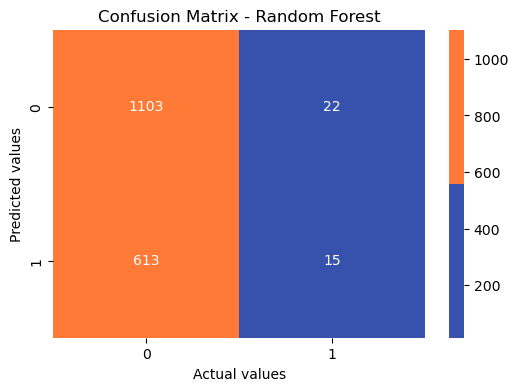

In [32]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap=sns.color_palette(['#3652AD', '#FE7A36']))
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

### Support Vector Machine (SVM)
Support Vector Machine (SVM) is a machine learning algorithm that excels classification and regression tasks. Picture it as a line or boundary that best separates different groups in your data.

For classification, SVM aims to draw a line (or hyperplane in higher dimensions) in such a way that it maximizes the margin between different classes. The "support vectors" are the data points that are closest to the decision boundary.

#### Define model and fit it to data

In [33]:
from sklearn.svm import SVC

model_svm = SVC(kernel='linear', random_state=42)
model_svm.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


#### Make prediction

In [34]:
y_pred_svm = model_svm.predict(X_test_scaled)

#### Model evaluation

In [35]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.64
Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753



#### Confusion matrix

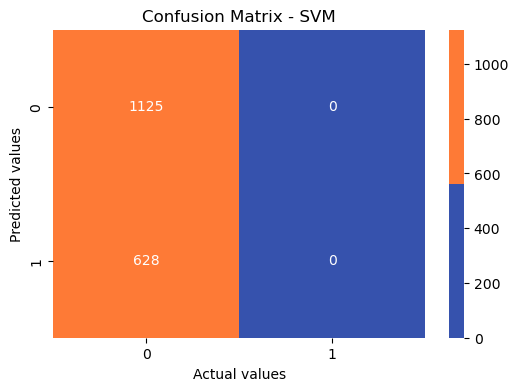

In [36]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap=sns.color_palette(['#3652AD', '#FE7A36']))
plt.title('Confusion Matrix - SVM')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

### K-Nearest Neighbors

K-Nearest Neighbors (KNN) is a straightforward and intuitive machine learning algorithm. Imagine you have a dataset with points on a graph. To predict the class of a new point, KNN looks at the 'k' nearest existing points to it. The majority class among those neighbors determines the class of the new point.

#### Define model and fit it to data

In [37]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


#### Make prediction

In [38]:
y_pred_knn = model_knn.predict(X_test_scaled)

#### Model evaluation

In [39]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.57
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.76      0.69      1125
           1       0.34      0.22      0.27       628

    accuracy                           0.57      1753
   macro avg       0.49      0.49      0.48      1753
weighted avg       0.53      0.57      0.54      1753



#### Confusion matrix

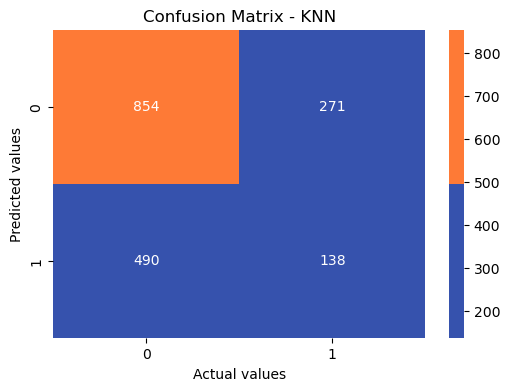

In [40]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap=sns.color_palette(['#3652AD', '#FE7A36']))
plt.title('Confusion Matrix - KNN')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

## 5. Model Evaluation
Evaluate models using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC. Use confusion matrices and plots to interpret results.  
*(Goal: Understand strengths and weaknesses of each model.)*

### Models summary

In [41]:
models = {'KNN' : accuracy_knn,
          'SVM' : accuracy_svm,
          'Random Forest' : accuracy_rf,
          'Logistic Regression' : accuracy_lr}

accuracy = pd.DataFrame(list(models.items()), columns=['Model', 'Accuracy'])
accuracy

,Model,Accuracy
0,KNN,0.565887
1,SVM,0.641757
2,Random Forest,0.637764
3,Logistic Regression,0.642898


## 6. Advanced Machine Learning Techniques
Improve model performance beyond the baseline.

### 6.1 Hyperparameter Tuning
Use techniques such as Grid Search, Random Search, or Bayesian Optimization to find the best parameters for chosen models.  
*(Goal: Optimize models for better accuracy and generalization.)*

### 6.2 Ensemble Learning
Apply methods like Bagging, Boosting, and Stacking to combine multiple models for stronger performance.  
*(Goal: Leverage the power of multiple models to reduce bias/variance.)*

## 7. Conclusion & Next Steps
Summarize the findings, highlight the best-performing model, and suggest future improvements (e.g., collecting more data, trying deep learning).  
*(Goal: Reflect on results and guide learners toward further exploration.)*